In [546]:
#Importing required libraries
import csv
import math
import random
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
import numpy as np
import re
import nltk
import csv
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
import tokenizers
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi
import strgen
strgen.StringGenerator("[\d\w]{10}").render()
'sj5ic8vebF'

'sj5ic8vebF'

In [547]:
# Veri setinin yüklenmesi
data = pd.read_csv('17Ktweets.csv', sep= ';', encoding='iso-8859-9')
df = pd.DataFrame(data)
df = np.array(df)

In [548]:
nltk.download('stopwords')
stop_word_list = stopwords.words('turkish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RCenk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [549]:
# data = data.dropna().reset_index(drop=True)
data.dropna().reset_index(drop = True)
data.isnull().sum()

Tweets    0
Status    0
dtype: int64

In [550]:
def preprocess_text(conv):
    
    sentence = re.sub('[\d\s]', ' ', str(conv))
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)
    return single_doc.lower()

In [551]:
y=[doc for doc in data.iloc[:,1]]
# Y = data['Status']
X = data['Tweets']
X = X.apply(preprocess_text)
pd.DataFrame(data = X)

#pd.DataFrame(data = Y)

,Tweets
0,ulan wifi ye bağlıyım ben ona bağlıyken turkce...
1,dk gb internet mb sadece kaşar turkcell düşer ...
2,ayrıca turkcell superonline reklamı kadar kötü...
3,turkcell pahalı
4,turkcell kaş ta internetin cekmiyor
...,...
17284,turktelekom kalite sıfır bi turkcell değilsiniz
17285,turkcell yandex yerli arama motoru üzerine çal...
17286,turkcell yeni reklaminda altta kayan bilgilend...
17287,turkcell yazılım mühendisi maaşı hakkında bilg...


In [552]:
words = []
for i in X:
    words.append(i.split())

print(words[0])

['ulan', 'wifi', 'ye', 'bağlıyım', 'ben', 'ona', 'bağlıyken', 'turkcell', 'internet', 'paketin', 'bitti', 'mesaj', 'atabilir', 'bana', 'onu', 'ödeyelim']


In [553]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(X)
X = tokenizer_obj.texts_to_sequences(X)
X = pad_sequences(X)

In [554]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [556]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) # 80% training and 20% test

In [557]:
def seperateByClass(dataset):
    seperated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in seperated):
            seperated[vector[-1]] = []
        seperated[vector[-1]].append(vector)
    return seperated

In [558]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers]) / float(len(numbers) -1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [559]:
def summerizeByClass(dataset):
    seperated = seperateByClass(dataset)
    summaries = {}
    for classValue,instances in seperated.items():
        summaries[classValue]  = summarize(instances)
    return summaries

In [560]:
def calculateProbability(x,mean,stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/ (math.sqrt(2*math.pi)*stdev))*exponent

In [561]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue,classSummaries in summaries.items():
        probabilities[classValue]  = 1
        for i in range(len(classSummaries)):
            mean,stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
        return probabilities

In [562]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries,inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = property
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSize):
    predictions  = []
    for i in range(len(testSize)):
        result = predict(summaries, testSize[i])
        predictions.append(result)
    return predictions

In [563]:
def getAccuracy(testSet,predictions):
    correct = 10
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct +=1
    return (correct/float(len(testSet)))*100.0

In [564]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [565]:
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.3299595141700405


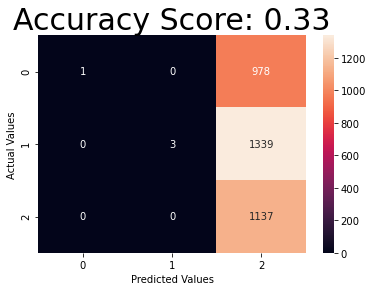

In [566]:
predictions = clf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 30)
plt.show()

In [567]:
print(classification_report(y_test, predictions, target_names=['1', '2', '3']))

precision    recall  f1-score   support

           1       1.00      0.00      0.00       979
           2       1.00      0.00      0.00      1342
           3       0.33      1.00      0.50      1137

    accuracy                           0.33      3458
   macro avg       0.78      0.33      0.17      3458
weighted avg       0.78      0.33      0.17      3458

